# Country Data

We need to have country-specific values in the data frames. 

This requires to upgrade the core engine.

In [1]:
import pandas as pd 
import pint
import numpy as np

In [189]:
date_range =10
countries = ['UK', 'FR']

iterables = [countries, range(date_range)]
index_names = ['country', 'time']
country_multi_index = pd.MultiIndex.from_product(iterables, names=index_names)
series2 = pd.Series((np.arange(20,date_range * len(countries)*2)).ravel(), index=country_multi_index)
# print(list(series2.index.values))
series2

country  time
UK       0       20
         1       21
         2       22
         3       23
         4       24
         5       25
         6       26
         7       27
         8       28
         9       29
FR       0       30
         1       31
         2       32
         3       33
         4       34
         5       35
         6       36
         7       37
         8       38
         9       39
dtype: int32

In [289]:
df = pd.DataFrame()
dfs=series2.groupby(level=0)
for country, new_df in dfs:
    if df.empty:
        df = new_df.droplevel(level=0)
    else: df =df.add(new_df.droplevel(level=0))
print(df)

FR
country  time
FR       0       30
         1       31
         2       32
         3       33
         4       34
         5       35
         6       36
         7       37
         8       38
         9       39
dtype: int32
time
0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int32
UK
country  time
UK       0       20
         1       21
         2       22
         3       23
         4       24
         5       25
         6       26
         7       27
         8       28
         9       29
dtype: int32
time
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
dtype: int32
time
0    50
1    52
2    54
3    56
4    58
5    60
6    62
7    64
8    66
9    68
dtype: int32


In [268]:
midx = pd.MultiIndex(levels=[['dog', 'cow', 'cat'],
                             ['speed', 'weight', 'length']],
                     codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                            [0, 1, 2, 0, 1, 2, 0, 1, 2]])
s = pd.Series([50, 30, 1.6, 30, 250, 1.5, 40, 18, 1.1],
              index=midx)
s.index.names
# s.drop(index='cow', columns='small')

FrozenList([None, None])

In [78]:
print(series2[['country']])
series2[['UK']]+series2[['FR']]

KeyError: "None of [Index(['country'], dtype='object')] are in the [columns]"

In [58]:
low = series2.abs().groupby(level=['country','time']).quantile(.25)
low

country  time
FR       0       20.0
         1       21.0
         2       22.0
         3       23.0
         4       24.0
         5       25.0
         6       26.0
         7       27.0
         8       28.0
         9       29.0
         10      30.0
         11      31.0
         12      32.0
         13      33.0
         14      34.0
         15      35.0
         16      36.0
         17      37.0
         18      38.0
         19      39.0
UK       0        0.0
         1        1.0
         2        2.0
         3        3.0
         4        4.0
         5        5.0
         6        6.0
         7        7.0
         8        8.0
         9        9.0
         10      10.0
         11      11.0
         12      12.0
         13      13.0
         14      14.0
         15      15.0
         16      16.0
         17      17.0
         18      18.0
         19      19.0
dtype: float64

In [50]:
low={}
lowuk = series2.loc[ 'UK' , : ].abs().groupby(level=['time']).quantile(.25)
low["UK"]= lowuk
lowfrance=series2.loc[ 'FR' , : ].abs().groupby(level=['time']).quantile(.25)
low["FR"]= lowfrance
low

{'UK': time
 0      0.0
 1      1.0
 2      2.0
 3      3.0
 4      4.0
 5      5.0
 6      6.0
 7      7.0
 8      8.0
 9      9.0
 10    10.0
 11    11.0
 12    12.0
 13    13.0
 14    14.0
 15    15.0
 16    16.0
 17    17.0
 18    18.0
 19    19.0
 dtype: float64, 'FR': time
 0     20.0
 1     21.0
 2     22.0
 3     23.0
 4     24.0
 5     25.0
 6     26.0
 7     27.0
 8     28.0
 9     29.0
 10    30.0
 11    31.0
 12    32.0
 13    33.0
 14    34.0
 15    35.0
 16    36.0
 17    37.0
 18    38.0
 19    39.0
 dtype: float64}

In [39]:
iterables = [range(date_range), range(5)]
index_names = ['time', 'samples']
_multi_index = pd.MultiIndex.from_product(iterables, names=index_names)
series = pd.Series((np.arange(date_range * 5).ravel()), index=_multi_index)
series

time  samples
0     0           0
      1           1
      2           2
      3           3
      4           4
                 ..
19    0          95
      1          96
      2          97
      3          98
      4          99
Length: 100, dtype: int32

In [40]:
low = series.abs().groupby(level=['time']).quantile(.25)
low

time
0      1.0
1      6.0
2     11.0
3     16.0
4     21.0
5     26.0
6     31.0
7     36.0
8     41.0
9     46.0
10    51.0
11    56.0
12    61.0
13    66.0
14    71.0
15    76.0
16    81.0
17    86.0
18    91.0
19    96.0
dtype: float64

In [84]:
start_date = '2010-01-01'
end_date = '2010-03-01'
date_range = pd.date_range(start_date, end_date, freq='MS')
samples = 2

In [85]:
countries = ['UK','FR']

In [86]:
iterables = [countries, date_range, range(samples) ]
index_names = ['country', 'time', 'samples' ]
country_multi_index = pd.MultiIndex.from_product(iterables, names=index_names)

In [87]:
pdf = pd.DataFrame(index=country_multi_index, dtype='pint[W]')
pdf['power'] = np.arange(len(date_range)* samples*len(countries)).ravel()

In [178]:
pdf = pd.DataFrame(index=country_multi_index, dtype='pint[W]')
sdf = pd.DataFrame(index=country_multi_index, dtype='pint[W]')
pdf['power'] = np.arange(len(date_range)* samples*len(countries)).ravel()
sdf['time'] = np.full((len(date_range), samples*len(countries)), 5).ravel()

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [89]:
power = pd.Series(np.arange(len(date_range)* samples*len(countries)).ravel(), index=country_multi_index,  dtype='pint[W]')
time = pd.Series(np.full((len(date_range), samples*len(countries)), 2).ravel(), index=country_multi_index,  dtype='pint[s]')

In [232]:
power

country  time        samples
UK       2010-01-01  0           0
                     1           1
         2010-02-01  0           2
                     1           3
         2010-03-01  0           4
                     1           5
FR       2010-01-01  0           6
                     1           7
         2010-02-01  0           8
                     1           9
         2010-03-01  0          10
                     1          11
dtype: pint[watt]

In [233]:
time

country  time        samples
UK       2010-01-01  0          2
                     1          2
         2010-02-01  0          2
                     1          2
         2010-03-01  0          2
                     1          2
FR       2010-01-01  0          2
                     1          2
         2010-02-01  0          2
                     1          2
         2010-03-01  0          2
                     1          2
dtype: pint[second]

In [177]:
# index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
# print(pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=index[:6]))
  
# Create the MultiIndex 
midx = pd.MultiIndex.from_tuples([(10, 'Ten'), (10, 'Twenty'),  
                                  (20, 'Ten'), (20, 'Twenty')],  
                                        names =['Num', 'Char']) 
  
# Print the MultiIndex 
# print(midx) 
frame=midx.to_frame(index = True)
# print(frame)
# print(frame.unstack())
print(frame.index.get_level_values('Num').unique())
for x in frame.index.get_level_values('Num'):
    print(x)
# print(frame['Char'].to_frame())
# print(frame['Char'].to_frame()["Char"]["Num"])

Int64Index([10, 20], dtype='int64', name='Num')
10
10
20
20


In [234]:
energy = power * time
energy

country  time        samples
UK       2010-01-01  0           0
                     1           2
         2010-02-01  0           4
                     1           6
         2010-03-01  0           8
                     1          10
FR       2010-01-01  0          12
                     1          14
         2010-02-01  0          16
                     1          18
         2010-03-01  0          20
                     1          22
dtype: pint[second * watt]

In [93]:
df = pd.DataFrame(index=country_multi_index)

In [94]:
df['time'] = time
df['power'] = power

In [101]:
df
print(df['time'])

country  time        samples
UK       2010-01-01  0          2
                     1          2
         2010-02-01  0          2
                     1          2
         2010-03-01  0          2
                     1          2
FR       2010-01-01  0          2
                     1          2
         2010-02-01  0          2
                     1          2
         2010-03-01  0          2
                     1          2
Name: time, dtype: pint[second]


In [29]:
df.pint.dequantify()

time power
unit                       second  watt
country time       samples             
UK      2010-01-01 0            2     0
                   1            2     1
        2010-02-01 0            2     2
                   1            2     3
        2010-03-01 0            2     4
                   1            2     5
FR      2010-01-01 0            2     6
                   1            2     7
        2010-02-01 0            2     8
                   1            2     9
        2010-03-01 0            2    10
                   1            2    11

# Mixed Mode operations

## create a three-dimensional DF

In [65]:
np.full((len(date_range), samples*len(countries)), 2).ravel()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
_data = [.5] * 6 + [.2] * 6
carbon = pd.Series(_data, index=country_multi_index,  dtype='pint[kg/kWh]')

In [67]:
carbon

country  time        samples
UK       2010-01-01  0          0.5
                     1          0.5
         2010-02-01  0          0.5
                     1          0.5
         2010-03-01  0          0.5
                     1          0.5
FR       2010-01-01  0          0.2
                     1          0.2
         2010-02-01  0          0.2
                     1          0.2
         2010-03-01  0          0.2
                     1          0.2
dtype: pint[kilogram / kilowatt_hour]

## create a two-dimensional DF

In [68]:
iterables = [date_range, range(samples)]
index_names = ['time', 'samples']
_multi_index = pd.MultiIndex.from_product(iterables, names=index_names)

In [69]:
power = pd.Series(np.full((len(date_range), samples), 10).ravel(), index=_multi_index,  dtype='pint[W]')
time = pd.Series(np.full((len(date_range), samples), 60).ravel(), index=_multi_index,  dtype='pint[s]')

In [70]:
energy = power * time

In [71]:
energy

time        samples
2010-01-01  0          600
            1          600
2010-02-01  0          600
            1          600
2010-03-01  0          600
            1          600
dtype: pint[second * watt]

In [90]:

energy * carbon

time        samples  country
2010-01-01  0        UK         300.0
                     FR         120.0
            1        UK         300.0
                     FR         120.0
2010-02-01  0        UK         300.0
                     FR         120.0
            1        UK         300.0
                     FR         120.0
2010-03-01  0        UK         300.0
                     FR         120.0
            1        UK         300.0
                     FR         120.0
dtype: pint[kilogram * second * watt / kilowatt_hour]

In [75]:
(carbon * energy).reorder_levels([2, 0 ,1 ])

country  time        samples
UK       2010-01-01  0          300.0
FR       2010-01-01  0          120.0
UK       2010-01-01  1          300.0
FR       2010-01-01  1          120.0
UK       2010-02-01  0          300.0
FR       2010-02-01  0          120.0
UK       2010-02-01  1          300.0
FR       2010-02-01  1          120.0
UK       2010-03-01  0          300.0
FR       2010-03-01  0          120.0
UK       2010-03-01  1          300.0
FR       2010-03-01  1          120.0
dtype: pint[kilogram * second * watt / kilowatt_hour]

In [16]:
energy.pint.m.mean()

11.0

In [28]:
energy.pint.m.mean(level='time')

time
2010-01-01     7
2010-02-01    11
2010-03-01    15
Freq: MS, dtype: int64

In [24]:
d = {}
d['UK'] = pdf
UK = pd.concat(d, axis=1)
UK.head(5)

UK     
                   power time
time       samples           
2010-01-01 0         5.3    5
           1         5.3    5
           2         5.3    5
2010-02-01 0         5.3    5
           1         5.3    5

In [25]:
d = {}
d['US'] = pdf
US = pd.concat(d, axis=1)
US.head(5)

US     
                   power time
time       samples           
2010-01-01 0         5.3    5
           1         5.3    5
           2         5.3    5
2010-02-01 0         5.3    5
           1         5.3    5

In [34]:
US.mul(UK, axis=1, level=1)

TypeError: Join on level between two MultiIndex objects is ambiguous

In [9]:
sdf.pint.units

AttributeError: 'PintDataFrameAccessor' object has no attribute 'units'

In [9]:
df = pd.DataFrame(index=_multi_index)

In [10]:
df['power'] = power
df['time'] = time

In [11]:
isinstance(df, pd.DataFrame)

True

In [164]:
df.pint.dequantify().head()

power   time
unit                watt second
time       samples             
2010-01-01 0         5.5      5
           1         5.5      5
           2         5.5      5
2010-02-01 0         5.5      5
           1         5.5      5

In [165]:
df= df.pint.dequantify()
df.columns = df.columns.droplevel(1)
df.head()

power  time
time       samples             
2010-01-01 0          5.5     5
           1          5.5     5
           2          5.5     5
2010-02-01 0          5.5     5
           1          5.5     5

In [167]:
df.mean(level='time')

,power,time
time,,
2010-01-01,5.5,5
2010-02-01,5.5,5
2010-03-01,5.5,5
2010-04-01,5.5,5
2010-05-01,5.5,5
2010-06-01,5.5,5
2010-07-01,5.5,5
2010-08-01,5.5,5
2010-09-01,5.5,5


In [159]:
df['power'].dtype

dtype('float64')

In [142]:
df.pint.dequantify()['power']['watt'].dtype

dtype('int64')

In [12]:
x = power * time

In [13]:
x.pint.to('Wh').iloc[0].m

0.007638888888888889

In [14]:
x.pint.to('Wh')

time        samples
2010-01-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-02-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-03-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-04-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-05-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-06-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-07-01  0          0.007638888888888889
            1          0.007638888888888889
            2          0.007638888888888889
2010-08-01  0          0.007638888888888889
            

In [25]:
'{:.02f~H}'.format(Q_(power.pint.m.mean(),power.pint.units))

'5.50 W'

In [20]:
Q()

NameError: name 'Q' is not defined

In [51]:
df['energy'].pint.to('J').head()

time        samples
2010-01-01  0          25.0
            1          25.0
            2          25.0
2010-02-01  0          25.0
            1          25.0
Name: energy, dtype: pint[joule]

In [53]:
df['power'].pint.units

<Unit('watt')>

In [34]:
df['energy'].pint.to('J').pint.m.head()

time        samples
2010-01-01  0          25.0
            1          25.0
            2          25.0
2010-02-01  0          25.0
            1          25.0
Name: energy, dtype: float64

In [30]:
df['energy'].pint.to('Wh').head()

time        samples
2010-01-01  0          0.006944444444444444
            1          0.006944444444444444
            2          0.006944444444444444
2010-02-01  0          0.006944444444444444
            1          0.006944444444444444
Name: energy, dtype: pint[watt_hour]

In [36]:
df['energy'].pint.to('Wh').pint.m.mean(level='time')

time
2010-01-01    0.006944
2010-02-01    0.006944
2010-03-01    0.006944
2010-04-01    0.006944
2010-05-01    0.006944
2010-06-01    0.006944
2010-07-01    0.006944
2010-08-01    0.006944
2010-09-01    0.006944
2010-10-01    0.006944
2010-11-01    0.006944
2010-12-01    0.006944
2011-01-01    0.006944
2011-02-01    0.006944
2011-03-01    0.006944
2011-04-01    0.006944
2011-05-01    0.006944
2011-06-01    0.006944
2011-07-01    0.006944
2011-08-01    0.006944
2011-09-01    0.006944
2011-10-01    0.006944
2011-11-01    0.006944
2011-12-01    0.006944
2012-01-01    0.006944
2012-02-01    0.006944
2012-03-01    0.006944
2012-04-01    0.006944
2012-05-01    0.006944
2012-06-01    0.006944
                ...   
2028-07-01    0.006944
2028-08-01    0.006944
2028-09-01    0.006944
2028-10-01    0.006944
2028-11-01    0.006944
2028-12-01    0.006944
2029-01-01    0.006944
2029-02-01    0.006944
2029-03-01    0.006944
2029-04-01    0.006944
2029-05-01    0.006944
2029-06-01    0.006944
2029-0

Next, we create a DataFrame with PintArrays as columns.

In [37]:
df = pd.DataFrame({
    "torque": pd.Series([1, 2, 2, 3], dtype="pint[lbf ft]"),
    "angular_velocity": pd.Series([1, 2, 2, 3], dtype="pint[rpm]"),
})
df

,torque,angular_velocity
0,1,1
1,2,2
2,2,2
3,3,3


Operations with columns are units aware so behave as we would intuitively expect.

In [38]:
df['power'] = df['torque'] * df['angular_velocity']
df

,torque,angular_velocity,power
0,1,1,1
1,2,2,4
2,2,2,4
3,3,3,9


In [109]:
{v[0]:v[1] for v in df.pint.dequantify().columns.values}

{'power': 'watt', 'time': 'second', 'energy': 'second * watt'}

We can see the columns' units in the dtypes attribute

In [40]:
df.dtypes

torque                                       pint[foot * force_pound]
angular_velocity                         pint[revolutions_per_minute]
power               pint[foot * force_pound * revolutions_per_minute]
dtype: object

Each column can be accessed as a Pandas Series

In [41]:
df.power

0    1
1    4
2    4
3    9
Name: power, dtype: pint[foot * force_pound * revolutions_per_minute]

Which contains a PintArray

In [42]:
df.power.values

PintArray([1 foot * force_pound * revolutions_per_minute,
           4 foot * force_pound * revolutions_per_minute,
           4 foot * force_pound * revolutions_per_minute,
           9 foot * force_pound * revolutions_per_minute],
          dtype='pint[foot * force_pound * revolutions_per_minute]')

The PintArray contains a Quantity

In [43]:
df.power.values.quantity

array([1, 4, 4, 9]) <Unit('foot * force_pound * revolutions_per_minute')>

Pandas Series accessors are provided for most Quantity properties and methods, which will convert the result to a Series where possible.

In [44]:
df.power.pint.units

<Unit('foot * force_pound * revolutions_per_minute')>

In [45]:
df.power.pint.to("kW").values

PintArray([0.00014198092353610376 kilowatt, 0.000567923694144415 kilowatt,
           0.000567923694144415 kilowatt, 0.0012778283118249339 kilowatt],
          dtype='pint[kilowatt]')

## Reading from csv

Reading from files is the far more standard way to use pandas. To facilitate this, DataFrame accessors are provided to make it easy to get to PintArrays. 

In [ ]:
import pandas as pd 
import pint
import io

Here's the contents of the csv file.

In [ ]:
test_data = '''speed,mech power,torque,rail pressure,fuel flow rate,fluid power
rpm,kW,N m,bar,l/min,kW
1000.0,,10.0,1000.0,10.0,
1100.0,,10.0,100000000.0,10.0,
1200.0,,10.0,1000.0,10.0,
1200.0,,10.0,1000.0,10.0,'''

Let's read that into a DataFrame.
Here io.StringIO is used in place of reading a file from disk, whereas a csv file path would typically be used and is shown commented.

In [ ]:
df = pd.read_csv(io.StringIO(test_data),header=[0,1])
# df = pd.read_csv("/path/to/test_data.csv",header=[0,1])
df

Then use the DataFrame's pint accessor's quantify method to convert the columns from `np.ndarray`s to PintArrays, with units from the bottom column level.

In [ ]:
df.dtypes

In [ ]:
df_ = df.pint.quantify(level=-1)
df_

As previously, operations between DataFrame columns are unit aware

In [ ]:
df_.speed*df_.torque

In [ ]:
df_

In [ ]:
df_['mech power'] = df_.speed*df_.torque
df_['fluid power'] = df_['fuel flow rate'] * df_['rail pressure']
df_

The DataFrame's `pint.dequantify` method then allows us to retrieve the units information as a header row once again.

In [ ]:
df_.pint.dequantify()

This allows for some rather powerful abilities. For example, to change single column units

In [ ]:
df_['fluid power'] = df_['fluid power'].pint.to("kW")
df_['mech power'] = df_['mech power'].pint.to("kW")
df_.pint.dequantify()

The units are harder to read than they need be, so lets change pints default format for displaying units.

In [ ]:
pint.PintType.ureg.default_format = "~P"
df_.pint.dequantify()

or the entire table's units

In [ ]:
df_.pint.to_base_units().pint.dequantify()

## Advanced example
This example shows alternative ways to use pint with pandas and other features.

Start with the same imports.

In [ ]:
import pandas as pd 
import pint

We'll be use a shorthand for PintArray

In [ ]:
PA_ = pint.PintArray

And set up a unit registry and quantity shorthand.

In [ ]:
ureg=pint.UnitRegistry()
Q_=ureg.Quantity

Operations between PintArrays of different unit registry will not work. We can change the unit registry that will be used in creating new PintArrays to prevent this issue.

In [ ]:
pint.PintType.ureg = ureg

These are the possible ways to create a PintArray.

Note that pint[unit] must be used for the Series constuctor, whereas the PintArray constructor allows the unit string or object.

In [ ]:
df = pd.DataFrame({
        "length" : pd.Series([1,2], dtype="pint[m]"),
        "width" : PA_([2,3], dtype="pint[m]"),
        "distance" : PA_([2,3], dtype="m"),
        "height" : PA_([2,3], dtype=ureg.m),
        "depth" : PA_.from_1darray_quantity(Q_([2,3],ureg.m)),
    })
df

In [ ]:
df.length.values.units

In [147]:
text = 'test'

In [149]:
for i in range(0,10):
    print(str(i) + text)

0test
1test
2test
3test
4test
5test
6test
7test
8test
9test


In [145]:
a

range(0, 10)

In [150]:
%matplotlib inline

In [151]:
import matplotlib.pyplot as plot

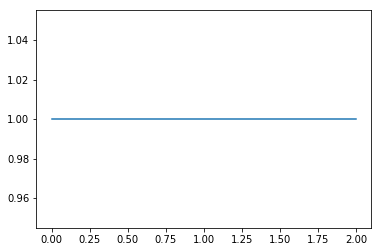

In [152]:
plot.plot([0,1,2], [1,1,1])